# Inaugural Project

## Authers
- Joachim Niemman
- Oliver Hjorhoey
- Frederik Alexander Jensen

#### Imports and set magics:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2
from ExchangeEconomy import ExchangeEconomyClass
from scipy.optimize import minimize_scalar
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1 

In [2]:
## global parameters
## applicable to all
## exercises
alpha = 1/3
beta  = 2/3
endowment = [0.8, 0.3]

In [3]:
## Imports
from inauguralproject import utility, demand
import numpy as np
import matplotlib.pyplot as plt

### Initial Setup

We define the initial `utility` for consumer `A` and `B`. 

In [4]:
# 1) Calculate initial utility for each consumer
# For consumer A
initial_utility_a = utility(
    fraction=alpha, 
    good=endowment
)

# For consumer B
initial_utility_b = utility(
    fraction=beta,
    good=[1 - x for x in endowment]
)

# 2) Define the range of goods accordingly
goods = np.array(range(0, 75)) / 74

To find the allocation that leaves both consumers as well off, we do a `cross join` using `meshgrid`,

In [5]:
## 1) define the 
## goods using linspace
## was originally 75
goods = np.linspace(
    start = 0,
    stop  = 1,
    num   = 100
) 

## 2) cross join
## the goods and store
## as good_1 an good_2
good_1, good_2 = np.meshgrid(goods, goods)

## 3) calculate the utility
## for all possible values
utility_a_values = utility(fraction=alpha, good=[good_1, good_2])
utility_b_values = utility(fraction=beta, good=[1-good_1, 1-good_2])

## 4) locate all cases where
## the utility is higher than the initial utility
## for each consumer
idx = (utility_a_values >= initial_utility_a) & (utility_b_values >= initial_utility_b)

## 5) select all 
## values that match
good_1_demand = good_1[idx]
good_2_demand = good_2[idx]


The corresponding pareto improvements can be plotted using `matplotlib`,

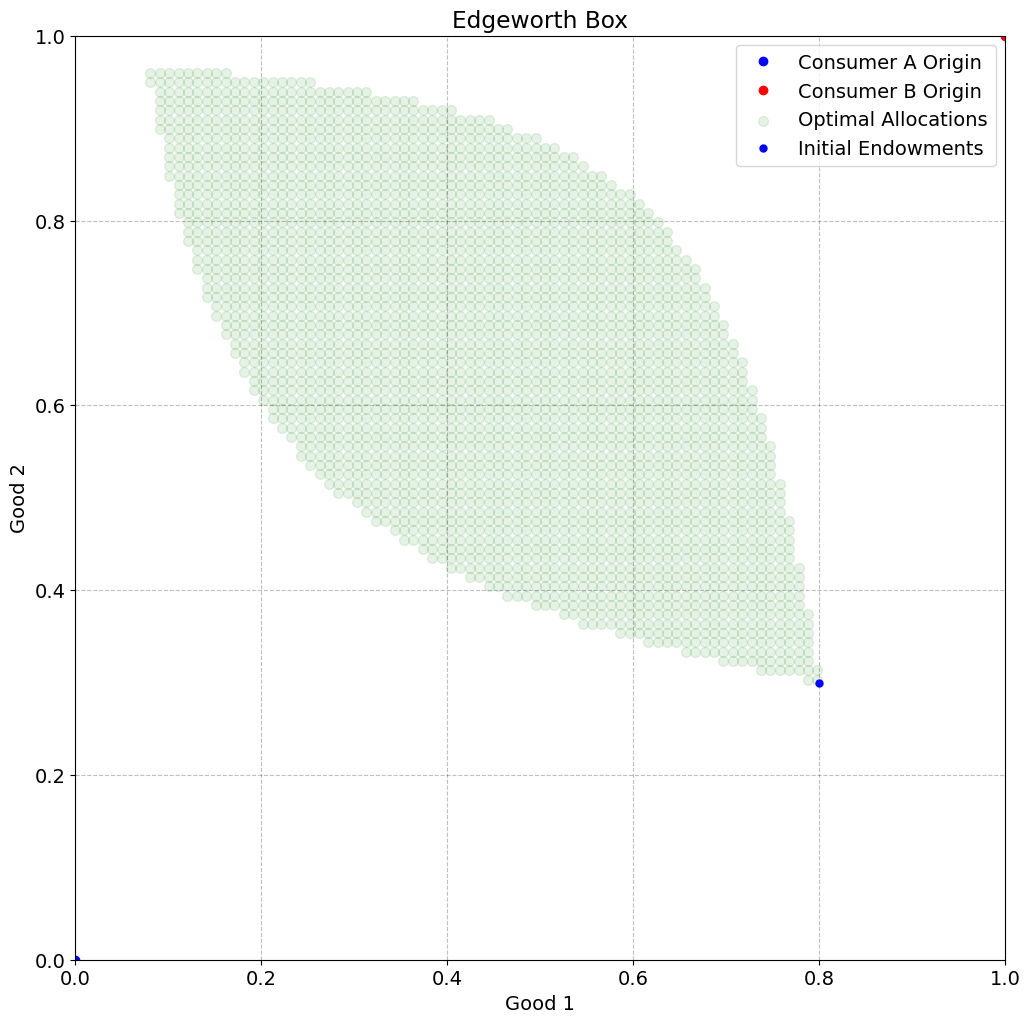

In [6]:
## 1) set the boundaries
## for each good
total_good1 = 1
total_good2 = 1

## 2) initialise
## the plot as ax
fig, ax = plt.subplots(figsize=(12, 12))

## 3) set the limits for the
## y- and x-axis;
ax.set_xlim(0, total_good1)
ax.set_ylim(0, total_good2)

## 4) add labels
## good 1 and good 2, with 
## an appropriate title
ax.set_xlabel('Good 1')
ax.set_ylabel('Good 2')
ax.set_title('Edgeworth Box')

## 5) plot origins of each
## consumer (Not necessary)
## but why not.

## 5.1) consumer A
ax.plot(
    0, 
    0,
    'o',
    color='blue',
    label='Consumer A Origin'
)

## 5.2) consumer B
ax.plot(
    total_good1,
    total_good2,
    'o',
    color='red',
    label='Consumer B Origin'
)

## 6) add all points
## where there is a
## pareto improvement
ax.scatter(
    good_1_demand,
    good_2_demand,
    s = 50,
    color='green',
    label='Optimal Allocations',
    alpha = 0.1
)

## 7) plot the
## initial endowments
ax.plot(
    endowment[0],
    endowment[1],
    'o',
    markersize=5,
    color='blue',
    label='Initial Endowments'
)

## 8) add a legend
## (self-generated)
ax.legend()

## 9) show the
## plot
plt.show()

# Question 2

Explain your code and procedure

In [7]:
# Given parameters
alpha = 1/3
beta = 2/3
omega1_A = 0.8
omega2_A = 0.3
omega1_B = 1 - omega1_A
omega2_B = 1 - omega2_A
p2 = 1  # Numeraire

# Function to calculate demands for A
def demand_A(p1, omega1_A, omega2_A, alpha):
    xA1 = alpha * ((p1 * omega1_A) + (p2 * omega2_A)) / p1
    xA2 = (1 - alpha) * ((p1 * omega1_A) + (p2 * omega2_A)) / p2
    return xA1, xA2

# Function to calculate demands for B
def demand_B(p1, omega1_B, omega2_B, beta):
    xB1 = beta * ((p1 * omega1_B) + (p2 * omega2_B)) / p1
    xB2 = (1 - beta) * ((p1 * omega1_B) + (p2 * omega2_B)) / p2
    return xB1, xB2

# Price range P1
N = 100  # Assuming a value for N to generate the price range
P1 = np.linspace(0.5, 2.5, N)

# Calculating the errors
epsilon1 = []
epsilon2 = []

for p1 in P1:
    xA1, xA2 = demand_A(p1, omega1_A, omega2_A, alpha)
    xB1, xB2 = demand_B(p1, omega1_B, omega2_B, beta)
    
    # Calculating the errors
    e1 = xA1 + xB1 - (omega1_A + omega1_B)
    e2 = xA2 + xB2 - (omega2_A + omega2_B)
    
    epsilon1.append(e1)
    epsilon2.append(e2)

# Output the results for inspection
epsilon1[:1], epsilon2[:1]  # Showing the first 5 values as an example


([0.533333333333333], [-0.2666666666666666])

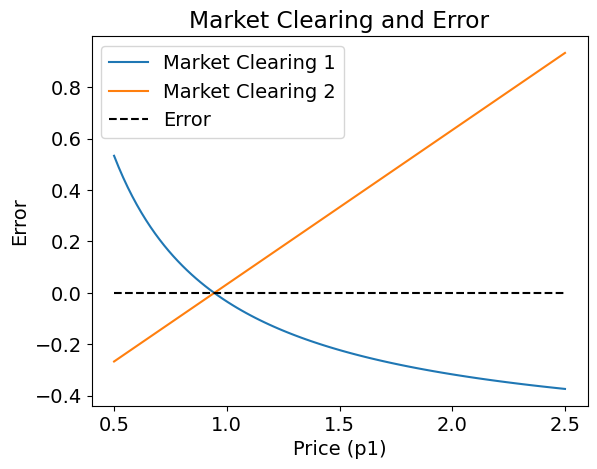

In [8]:
# Plot market clearing
plt.plot(P1, epsilon1, label='Market Clearing 1')
plt.plot(P1, epsilon2, label='Market Clearing 2')

# Plot error
plt.plot(P1, [0] * len(P1), 'k--', label='Error')

# Set labels and title
plt.xlabel('Price (p1)')
plt.ylabel('Error')
plt.title('Market Clearing and Error')
plt.legend()

# Remove grid
plt.grid(False)

# Show the plot
plt.show()



# Question 3

In [9]:
# Calculate market clearing price
market_clearing_price = P1[np.argmin(np.abs(epsilon1))]

# Print market clearing price with two decimal places
print("The market clearing price is: {:.2f}".format(market_clearing_price))


The market clearing price is: 0.94


Explain your code and procedure

### CONCISE CONLUSION


In this exchange economy analysis, we successfully solved for market equilibrium and illustrated Pareto improvements. By finding the market clearing price (p1 = 0.94) and calculating demand functions, we gained insights into resource allocation dynamics. The Edgeworth box visualization highlighted potential welfare gains, emphasizing the significance of market equilibrium.  

# Question 4

In [10]:
from scipy.optimize import minimize

# Define the utility function for agent A
def utility_A(xB, omega_B):
    xB1, xB2 = xB
    # Define your utility function here, for example:
    return -(1 - xB1) - (1 - xB2)  # Negative sign for maximization

# Define the constraint function for p1 > 0
def constraint(p1):
    return p1  # Constraint function: p1 > 0

# Initial guess for xB1 and xB2
initial_guess = [0.5, 0.5]

# Define bounds for xB1 and xB2
bounds = [(0, 1), (0, 1)]  # Bounds for xB1 and xB2, e.g., between 0 and 1

# Define the optimization problem
problem = {
    'fun': utility_A,
    'x0': initial_guess,
    'args': ([],),  # Additional arguments for the utility function (omega_B)
    'bounds': bounds,
    'constraints': [{'type': 'ineq', 'fun': constraint}]  # Constraint function for p1 > 0
}

# Solve the optimization problem
result = minimize(**problem)

# Extract the optimal allocation
optimal_allocation = result.x

print("Optimal allocation with any positive price p1:", optimal_allocation)
print("Maximum utility:", -result.fun)  # Convert back to positive for readability


Optimal allocation with any positive price p1: [0. 0.]
Maximum utility: 2.0


# Question 5a

In [11]:
# initial values
initial_utility_a = utility(fraction=alpha, good=endowment)
initial_utility_b = utility(fraction=beta, good=[1 - x for x in endowment])

# Set up goods
goods = np.array(range(0, 76)) / 75
# For each value there
# is in the goods, we scan through 
# the others
good_1_demand = []
good_2_demand = []
utility_1 = []
utility_2 = []

for good_1 in goods:
    for good_2 in goods:
        # Calculate the utility of each 
        # endowment
        utility_a = utility(fraction=alpha, good=[good_1, good_2])
        utility_b = utility(fraction=beta, good=[1 - good_1, 1 - good_2])

        # as long as the utility is higher
        # than the initial utility we continue
        # loop
        previous_utility = utility_a
        if utility_a >= previous_utility and utility_b >= initial_utility_b:
            good_1_demand.append(good_1)
            good_2_demand.append(good_2)
            utility_1.append(utility(fraction=alpha, good=[good_1, good_2]))


In [12]:
print(
    dict(
        utility = round(max(utility_1), 3)
    )
)


{'utility': 0.742}


# Question 5b

In [13]:
# initial values
initial_utility_a = utility(fraction=alpha, good=endowment)
initial_utility_b = utility(fraction=beta, good=[1 - x for x in endowment])

# Set up goods
goods = np.linspace(start=0,stop=1,num=1000)
# For each value there
# is in the goods, we scan through 
# the others
good_1_demand = []
good_2_demand = []
utility_1 = []
utility_2 = []

for good_1 in goods:
    for good_2 in goods:
        # Calculate the utility of each 
        # endowment
        utility_a = utility(fraction=alpha, good=[good_1, good_2])
        utility_b = utility(fraction=beta, good=[1 - good_1, 1 - good_2])

        # as long as the utility is higher
        # than the initial utility we continue
        # loop
        previous_utility = utility_a
        if utility_a >= previous_utility and utility_b >= initial_utility_b:
            good_1_demand.append(good_1)
            good_2_demand.append(good_2)
            utility_1.append(utility(fraction=alpha, good=[good_1, good_2]))
        else:
            break

In [14]:
print(
    dict(
        utility = round(max(utility_1), 3)
    )
)

{'utility': 0.743}


# Question 6

In this inquiry, we operate under the assumption that each consumer's acquisition of `good 2` is contingent upon `good 1` through the following relationship:

$good_2 = 1-good_1 $

In [15]:
## 1) Define utility
## functions
def aggregate_utility(good):
    utility_a = utility(fraction=alpha, good  = [good] + [1-good])
    utility_b = utility(fraction=beta,  good  = [1 - good] + [good])

    return (utility_a, utility_b, utility_a + utility_b)

## 2) define space of goods
## with 10.000 pairs
good = np.linspace(start=0, stop=1, num = 100000)

## 3) calculate
## utilities based
## on the linear space
## of goods
utility_a, utility_b, total_utility = aggregate_utility(good)


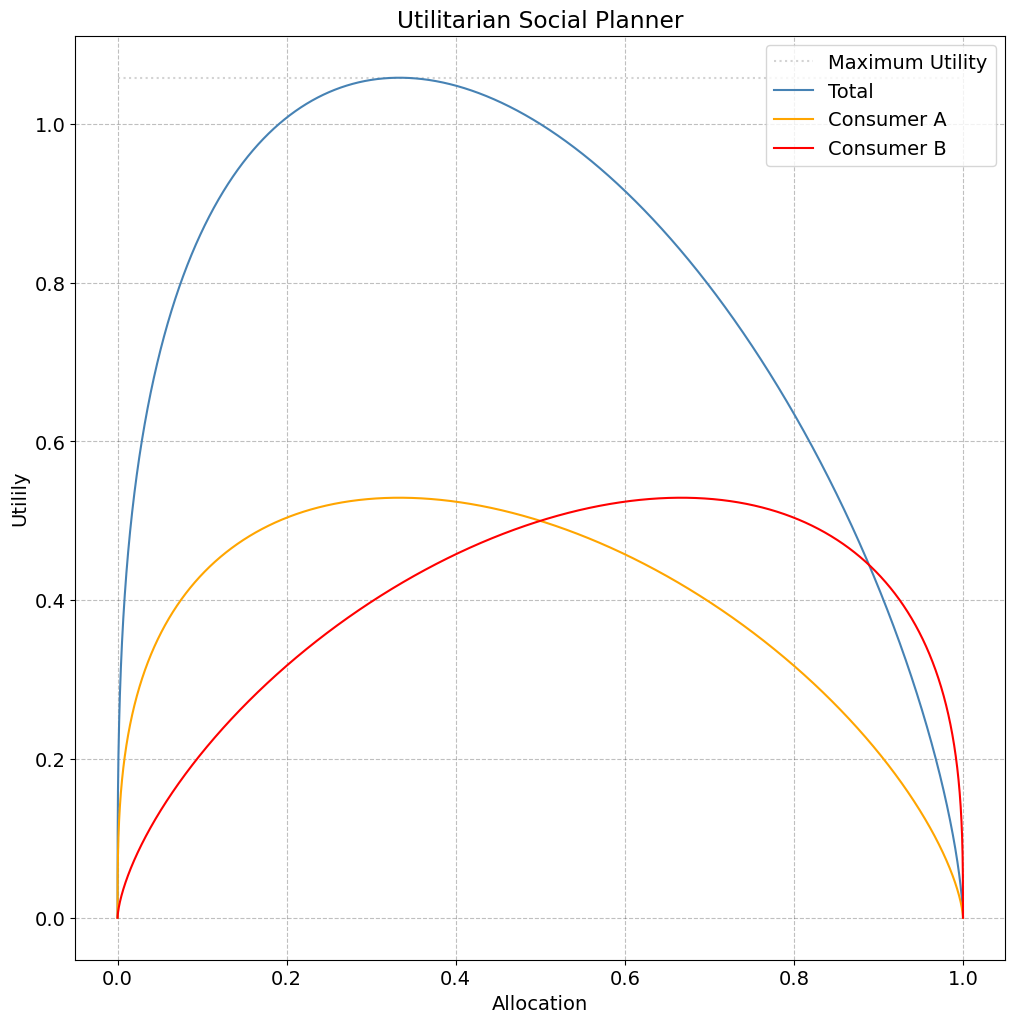

In [16]:
# 1) initialize
# the plot
fig, ax = plt.subplots(
    figsize=(12, 12)
)

# 1.1) plot title
ax.set_title(
    'Utilitarian Social Planner'
)

# 2) set label 
# axis
ax.set_xlabel('Allocation')
ax.set_ylabel('Utilily')
ax.hlines(
    y = np.max(total_utility),
    xmin= np.min(good),
    xmax = np.max(good),
    linestyles="dotted",
    label = "Maximum Utility",
    color = "lightgray"
)
ax.plot(good, total_utility, color='steelblue', label='Total')
ax.plot(good, utility_a, color='orange', label='Consumer A')
ax.plot(1-good, utility_b, color='red', label='Consumer B')
ax.legend()

plt.show()


# Question 6b

NameError: name 'par' is not defined

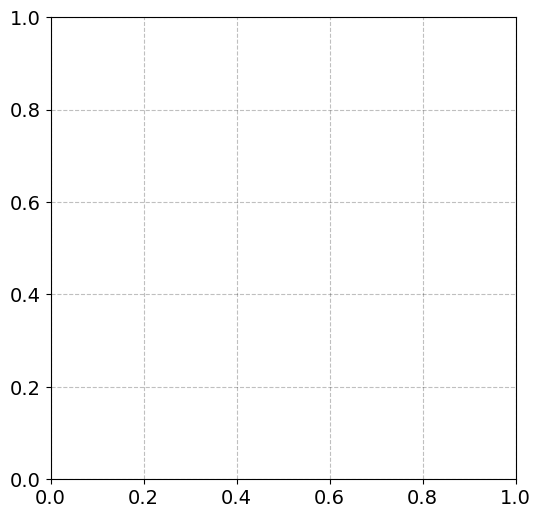

In [17]:
# Plotting the allocations
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting the endowment
ax.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment')

# Plotting allocation from question 3
ax.scatter(allocation_5a[0], allocation_5a[1], marker='o', color='red', label='Allocation 5a')

# Plotting allocation from question 4
ax.scatter(allocation_5b[0], allocation_5b[1], marker='o', color='blue', label='Allocation 5b')

# Plotting allocation from question 5
ax.scatter(allocation_6a[0], allocation_6a[1], marker='o', color='green', label='Allocation 6a')

# Setting the axis labels
ax.set_xlabel("$x_1^A$")
ax.set_ylabel("$x_2^A$")

# Adding a legend
ax.legend()

# Displaying the plot
plt.show()




# Question 7

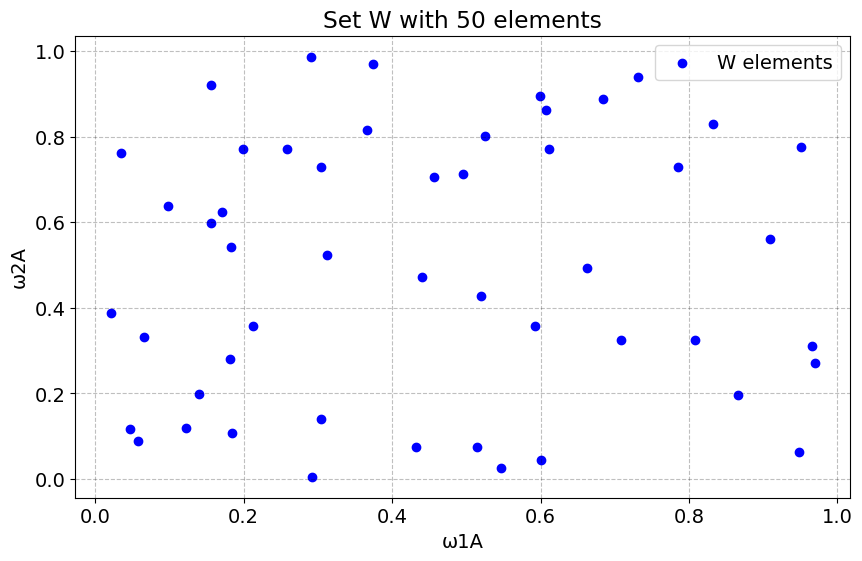

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 50 random elements for W
omega_1A = np.random.uniform(0, 1, 50)
omega_2A = np.random.uniform(0, 1, 50)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(omega_1A, omega_2A, c='blue', label='W elements')
plt.title('Set W with 50 elements')
plt.xlabel('ω1A')
plt.ylabel('ω2A')
plt.grid(True)
plt.legend()
plt.show()


# Question 8


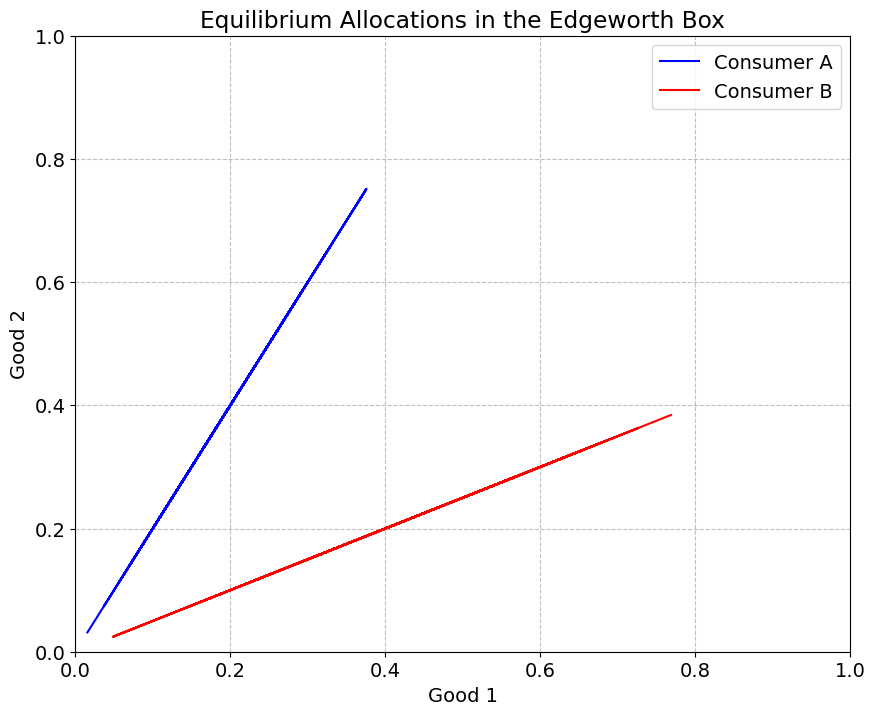

In [ ]:
from scipy.optimize import minimize_scalar

# Set the seed for reproducibility
np.random.seed(42)

# Generate 50 pairs of (ω1A, ω2A) from a uniform distribution U(0, 1)
W = np.random.uniform(low=0, high=1, size=(50, 2))

# Parameters
alpha = 1/3
beta = 2/3

# Define utility functions
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

# Define demand functions for a given price p1 and endowments ω
def demand_A(p1, omega_A):
    omega_1A, omega_2A = omega_A
    xA1 = alpha * (omega_1A + omega_2A / p1)
    xA2 = (1-alpha) * (omega_1A + omega_2A / p1)
    return xA1, xA2

def demand_B(p1, omega_A):
    omega_1A, omega_2A = omega_A
    omega_1B = 1 - omega_1A
    omega_2B = 1 - omega_2A
    xB1 = beta * (omega_1B + omega_2B / p1)
    xB2 = (1-beta) * (omega_1B + omega_2B / p1)
    return xB1, xB2

# Objective function for consumer A's utility maximization, given p1 and ωA
def objective_A(p1, omega_A):
    _, omega_2A = omega_A
    xB1, xB2 = demand_B(p1, omega_A)
    # Consumer A's utility, given they choose price p1
    return -uA(1-xB1, 1-xB2)  # Negative because we minimize

# Market equilibrium allocations for each ωA in W
equilibrium_allocations = []

for omega_A in W:
    # Find the market clearing price p1 that maximizes consumer A's utility
    res = minimize_scalar(objective_A, bounds=(0.01, 5), args=(omega_A,), method='bounded')
    p1_opt = res.x
    xA1, xA2 = demand_A(p1_opt, omega_A)
    xB1, xB2 = demand_B(p1_opt, omega_A)
    equilibrium_allocations.append(((xA1, xA2), (xB1, xB2), p1_opt))

# Prepare the data for plotting in the Edgeworth box
xA1_allocations = [alloc[0][0] for alloc in equilibrium_allocations]
xA2_allocations = [alloc[0][1] for alloc in equilibrium_allocations]
xB1_allocations = [alloc[1][0] for alloc in equilibrium_allocations]
xB2_allocations = [alloc[1][1] for alloc in equilibrium_allocations]

# Plot the Edgeworth box with equilibrium allocations
plt.figure(figsize=(10, 8))
plt.plot(xA1_allocations, xA2_allocations, color='blue', label='Consumer A')
plt.plot(xB1_allocations, xB2_allocations, color='red', label='Consumer B')
plt.title('Equilibrium Allocations in the Edgeworth Box')
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()
